In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, normalize

In [3]:
df = pd.read_csv('data/data_processed.csv')

## Select a subset of features
As there are too many features, we select only the most important features as input to the linear regression model.

In [10]:
# covert categorial features into one-hot encoding
selected_features = [
#      'travel_date_dow',
     'o_purpose_category',
     'd_purpose_category',
#      'num_non_hh_travelers',
#      'num_hh_travelers',
#      'num_travelers',
#      'o_location_type',
#      'd_location_type',
#      'o_congestion',
     'd_congestion',
#      'age',
#      'employment',
#      'student',
#      'license',
#      'planning_apps',
#      'industry',
#      'gender',
#      'education',
#      'survey_language',
#      'num_bicycles',
     'num_vehicles',
#      'res_type',
#      'rent_own',
     'income_aggregate',
#      'num_people',
#      'num_adults',
#      'num_kids',
#      'num_workers',
#      'num_students',
#      'disability'
]

df_selected = df[selected_features]

categorial_columns = ['travel_date_dow',
       'o_purpose_category', 'd_purpose_category', 'o_location_type',
       'd_location_type', 'age', 'employment', 'license', 'planning_apps', 'industry', 'gender'
                    , 'survey_language',
       'res_type', 'rent_own',  'disability']

onehot = pd.get_dummies(df_selected, columns=[x for x in categorial_columns if x in selected_features])


In [11]:
onehot

,d_congestion,num_vehicles,income_aggregate,o_purpose_category_1,o_purpose_category_2,o_purpose_category_3,o_purpose_category_4,o_purpose_category_5,o_purpose_category_6,o_purpose_category_7,...,d_purpose_category_1,d_purpose_category_2,d_purpose_category_3,d_purpose_category_4,d_purpose_category_5,d_purpose_category_6,d_purpose_category_7,d_purpose_category_8,d_purpose_category_9,d_purpose_category_10
0,0,2,4,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,2,4,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,2,4,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,2,4,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,2,4,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39439,0,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
39440,0,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
39441,0,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
39442,0,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
X = onehot.to_numpy()
X = normalize(X, axis=0)
y = df['trip_distance'].to_numpy()
group = df['person_id'].to_numpy()

In [13]:
X

array([[0.        , 0.00853805, 0.00513421, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00853805, 0.00513421, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00853805, 0.00513421, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.0025671 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0025671 , ..., 0.0133571 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0025671 , ..., 0.0133571 , 0.        ,
        0.        ]])

In [14]:
# Use small subset of data to see if it can overfit.
X = X[:10000]
y = y[:10000]
group = group[:10000]

In [18]:
# split train/validate data (grouped by person_id)

from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy import mean, absolute

def mad(data, axis=None):
    return mean(absolute(data - mean(data, axis)), axis)


k_fold = GroupKFold(n_splits=5)

mse = [] # [(training_mse, validation_mse, variance)]
mae = [] # [(training_mae, validation_mae, mean_avearge_deviation)]

for train_idx, validate_idx in k_fold.split(X, y, groups=group):
    print(f'train size: {len(train_idx)}, validation size: {len(validate_idx)}')
    
    # test linear regression
    X_train, X_val = X[train_idx], X[validate_idx]
    y_train, y_val = y[train_idx], y[validate_idx]
    
    model = LinearRegression().fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
#     print('training/validation mse/var: {:.2f} / {:.2f} / {:.2f}'.format(
#         mean_squared_error(y_pred_train, y_train),
#         mean_squared_error(y_pred_val, y_val),
#         np.var(y_val)
#     ))
    
#     print('training/validation mae:{:.2f} / {:.2f}'.format(
#         mean_absolute_error(y_pred_train, y_train),
#         mean_absolute_error(y_pred_val, y_val)
#     ))
    
    print('training mse / validation mse / variance: {:.2f} / {:.2f} / {:.2f}'.format(
        mean_squared_error(y_pred_train, y_train),
        mean_squared_error(y_pred_val, y_val),
        np.var(y_val)
    ))
    
    mse.append([
        mean_squared_error(y_pred_train, y_train),
        mean_squared_error(y_pred_val, y_val),
        np.var(y_val)
    ])
    
    
    print('training mse / validation mae / median absolute deviation:{:.2f} / {:.2f} / {:.2f}'.format(
        mean_absolute_error(y_pred_train, y_train),
        mean_absolute_error(y_pred_val, y_val),
        mad(y_val)
    ))
    
    mae.append([
         mean_absolute_error(y_pred_train, y_train),
        mean_absolute_error(y_pred_val, y_val),
        mad(y_val)
    ])
    
    
    print('')

pd.DataFrame(np.concatenate((mse, mae), axis=1),
             columns=['training mse', 'validation mse', 'variance of ground truth', 'training mae', 'validation_mae', 'mean absolute deviation'])

train size: 8000, validation size: 2000
training mse / validation mse / variance: 11.24 / 11.47 / 12.39
training mse / validation mae / median absolute deviation:2.30 / 2.27 / 2.54

train size: 8000, validation size: 2000
training mse / validation mse / variance: 10.75 / 13.42 / 14.47
training mse / validation mae / median absolute deviation:2.27 / 2.43 / 2.67

train size: 8000, validation size: 2000
training mse / validation mse / variance: 11.72 / 9.58 / 9.57
training mse / validation mae / median absolute deviation:2.35 / 2.28 / 2.18

train size: 8000, validation size: 2000
training mse / validation mse / variance: 11.25 / 11.40 / 12.55
training mse / validation mae / median absolute deviation:2.31 / 2.36 / 2.51

train size: 8000, validation size: 2000
training mse / validation mse / variance: 11.32 / 11.08 / 11.99
training mse / validation mae / median absolute deviation:2.33 / 2.30 / 2.39



,training mse,validation mse,variance of ground truth,training mae,validation_mae,mean absolute deviation
0,11.239917,11.467556,12.390847,2.301576,2.272626,2.535519
1,10.753311,13.420128,14.466394,2.265891,2.431439,2.666423
2,11.717497,9.584002,9.568953,2.352065,2.283354,2.179318
3,11.254582,11.399872,12.553006,2.306822,2.364159,2.510724
4,11.322163,11.080364,11.988500,2.327666,2.302115,2.390443


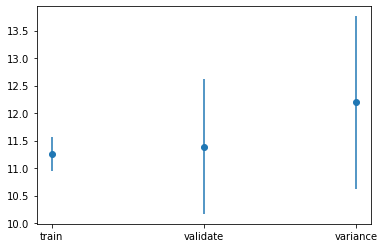

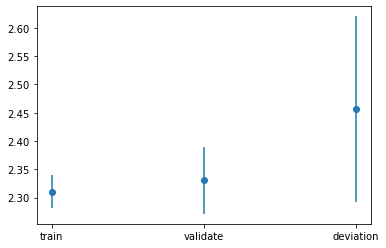

In [21]:
import matplotlib.pyplot as plt

mse_avg = np.average(np.array(mse), axis=0)
mse_std = np.std(np.array(mse), axis=0)
plt.xticks([0, 1, 2], ['train', 'validate', 'variance'])
plt.errorbar([0, 1, 2], mse_avg, yerr=mse_std, linestyle='None', marker='o')
plt.show()


mae_avg = np.average(np.array(mae), axis=0)
mae_std = np.std(np.array(mae), axis=0)
plt.xticks([0, 1, 2], ['train', 'validate', 'deviation'])
plt.errorbar([0, 1, 2], mae_avg, yerr=mae_std, linestyle='None', marker='o')
plt.show()